In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"G:\Data viz\ineuron Hackathon 25-06-22\mu_sigma\mu_sigma\Problem statement 1_dataset\adult.csv\adult.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
col = list(df.columns)
col

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'country',
 'salary']

In [5]:
for i in col:
    print(i,"\n",df[i].value_counts())

age 
 36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
workclass 
  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
fnlwgt 
 164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
education 
  HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool  

* Data is imbalance as people with salary <= 50K are 24720 and only 7841 having salary >50K
* So we would do binary classification
* As there are many catogorical features we will use catboost

# EDA

Text(0.5, 1.0, 'age-count vs salary')

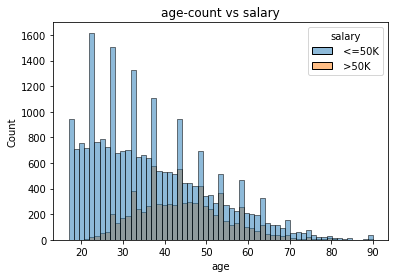

In [6]:
# hist plot of salary vs age
sns.histplot(x="age", hue = "salary", data=df)
plt.title("age-count vs salary")

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

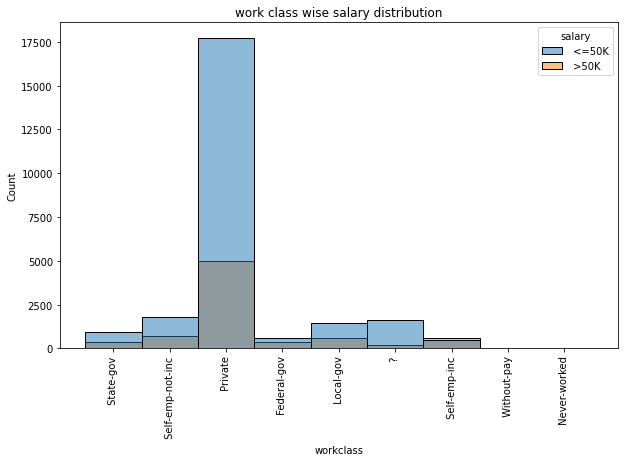

In [7]:
# work class wise salary distribution
plt.figure(figsize=(10,6))
sns.histplot(x="workclass", hue="salary", data =df)
plt.title("work class wise salary distribution")
plt.xticks(rotation=90)

# As we know private class is the highest and in that people having salary <=50K are more
# couldn't find relation of the Fnlwgt with the workclass

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

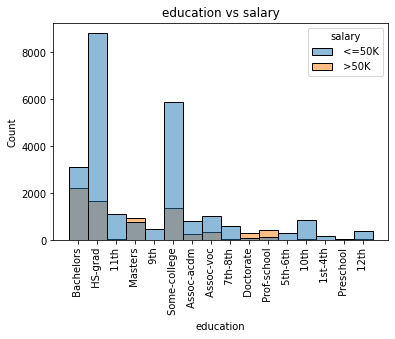

In [8]:
sns.histplot(x="education", hue = "salary", data=df)
plt.title("education vs salary")
plt.xticks(rotation=90)

# people with bachlores education have a higher ratio of salary >50K than others
# it seems that the education data is already numbered which can be used instead of encoding. (mostly dropping for catboost)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

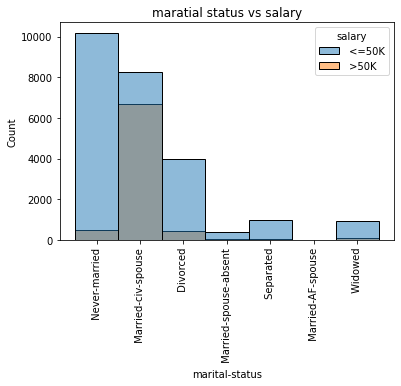

In [9]:
sns.histplot(x="marital-status", hue = "salary", data=df)
plt.title("maratial status vs salary")
plt.xticks(rotation=90)
# if a person is married_cvi_spouse then they have a high propability of having a salary >50K

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

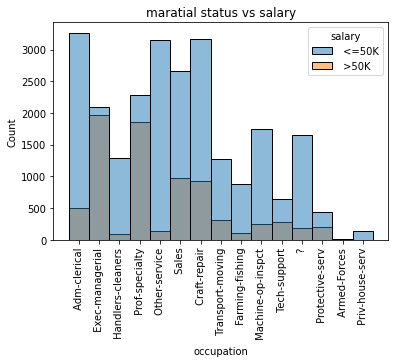

In [10]:
sns.histplot(x="occupation", hue = "salary", data=df)
plt.title("maratial status vs salary")
plt.xticks(rotation=90)
# if your profession is Exec-managerial or Prof-specialist then you have a high chance of having salary >50K

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

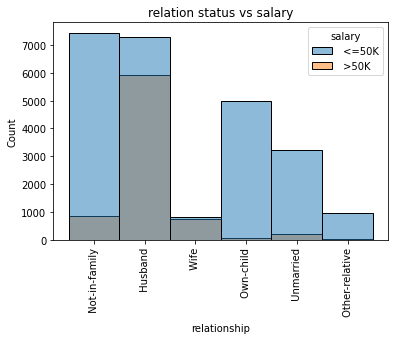

In [11]:
sns.histplot(x="relationship", hue = "salary", data=df)
plt.title("relation status vs salary")
plt.xticks(rotation=90)

# Didn't get the meaning but the data shows that if relation is husband salary is >50K

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

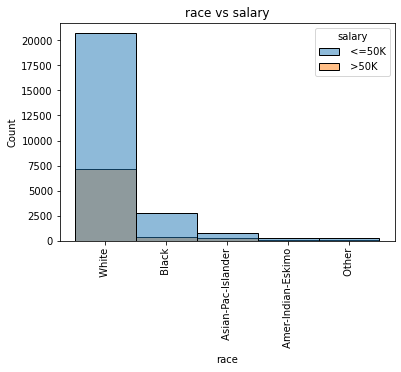

In [12]:
# Although I am against deciding the salary on race and sex basis we will see how salary is dependent in this data

sns.histplot(x="race", hue = "salary", data=df)
plt.title("race vs salary")
plt.xticks(rotation=90)

# As the data is from USA (income in dollars) more white people followed by black people records are present.
# Here we can see that mostly people irrespective of race have salary <=50K

Text(0.5, 1.0, 'sex vs salary')

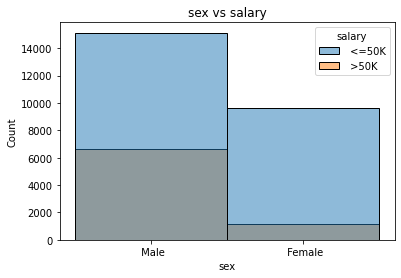

In [13]:
sns.histplot(x="sex", hue = "salary", data=df)
plt.title("sex vs salary")

# More males are employed but the ration of higher to lesser salary is higher in males compared to female.

In [14]:
df["capital-gain"].value_counts()

# alot of categories and does not make much sense

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital-gain, Length: 119, dtype: int64

In [15]:
df["capital-loss"].value_counts()

# does not make much sense

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital-loss, Length: 92, dtype: int64

Text(0.5, 1.0, 'hours-per-week vs salary')

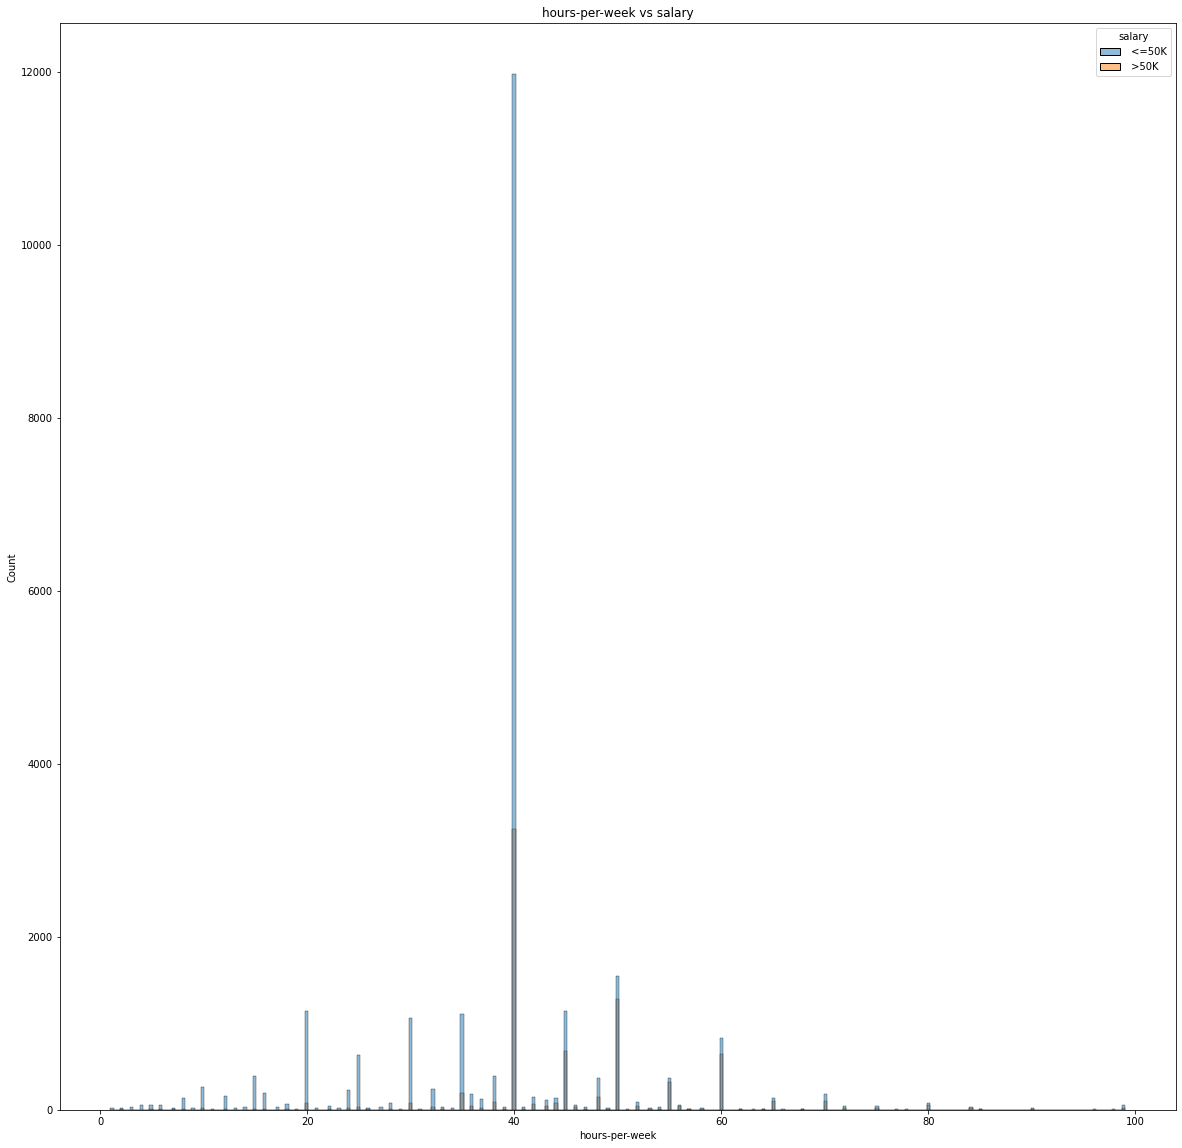

In [16]:
plt.figure(figsize=(20,20))
sns.histplot(x="hours-per-week", hue = "salary", data=df)
plt.title("hours-per-week vs salary")

# people working for 40hoursw are more apprx 12000 of which approx 3800 have a greater salary than 50K
# rest are not that significant.
# also some people work for 120hours and have salary less than 50K
# if you work for approx 48 hours your salary must greater than 50K mostly

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

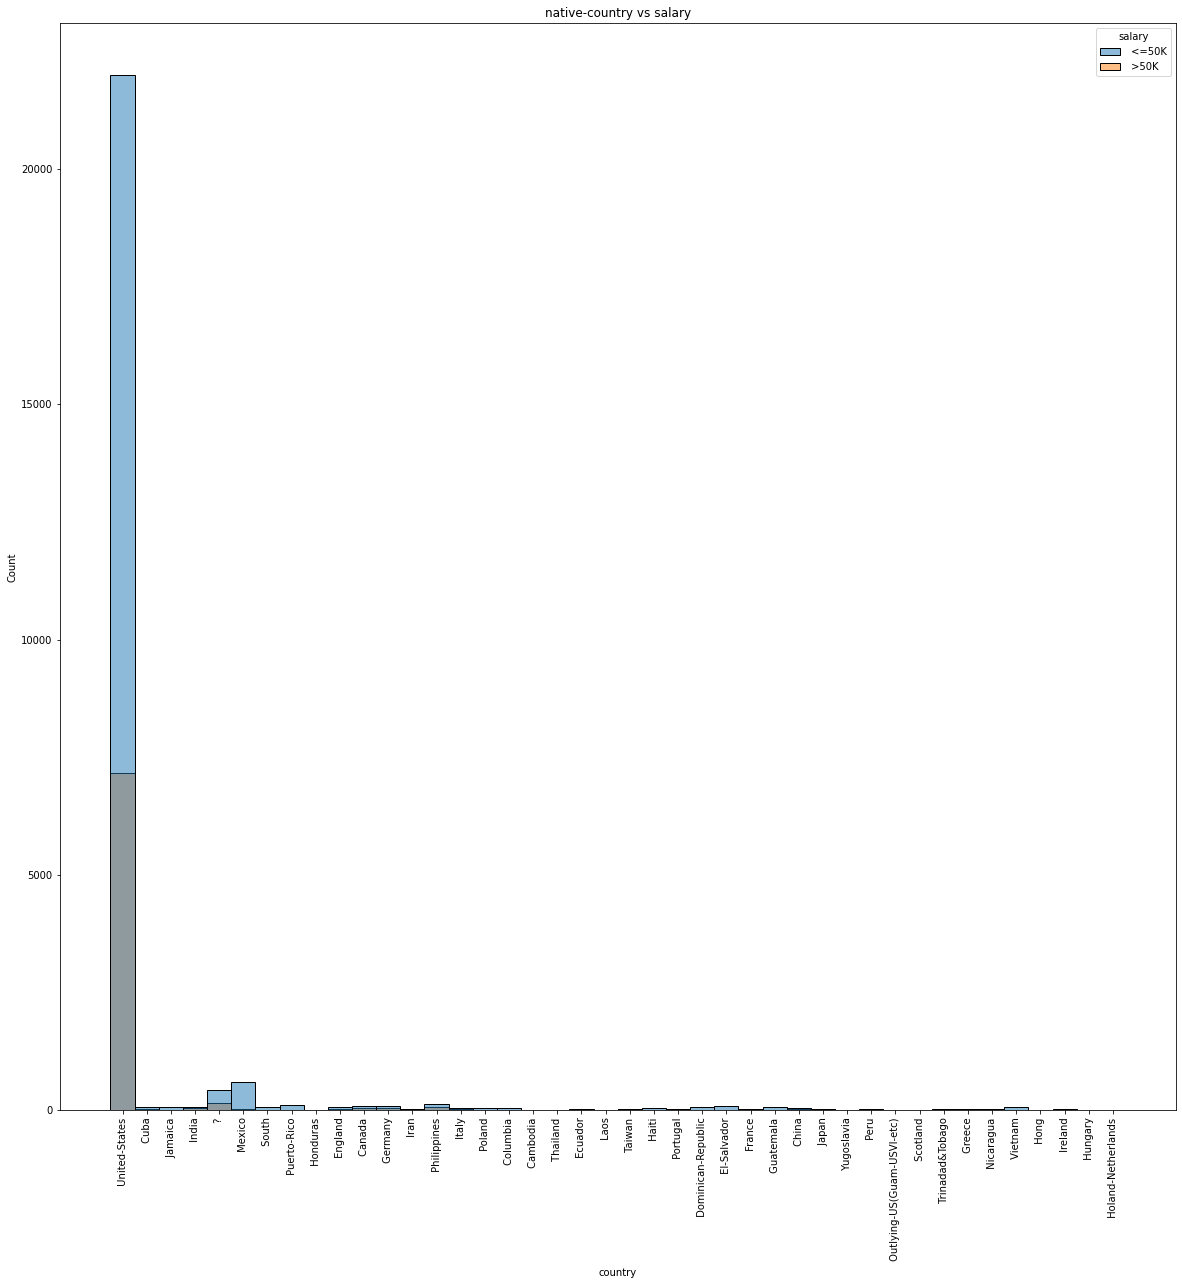

In [17]:
plt.figure(figsize=(20,20))
sns.histplot(x="country", hue = "salary", data=df)
plt.title("native-country vs salary")
plt.xticks(rotation=90)

# Most people are from US and 5500 out of 23000 have salary >50K

In [18]:
df.replace({" Private": "Private"," Self-emp-not-inc":"Self-emp-not-inc", " Local-gov":"Local-gov"," ?":"na"," State-gov":"State-gov"," Self-emp-inc":"Self-emp-inc"," Federal-gov":"Federal-gov"," Without-pay":"Without-pay"," Never-worked":"Never-worked"}, inplace = True)
df.replace({" ?":"na"}, inplace = True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [19]:
df["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
na                   1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [20]:
# it seems that all catagorical columns have a preceeding space causing a problem

def stripSpace(a):
    if type(a) == str:
        return a.strip()
    else:
        return a

# stripSpace(" Private")
# stripSpace(1)

In [21]:
for i in col:
    df[i]=df[i].apply(stripSpace)

In [22]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [23]:
df1=df.iloc[:,:]
df1
# dataframe.drop(['index_label'

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [24]:
X = df1.loc[:,['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week','country']]
# dropped capital_gain, capital_loss and the target "salary"
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States


In [25]:
y = df1.loc[:,['salary']]
y

,salary
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
32556,<=50K
32557,>50K
32558,<=50K
32559,<=50K


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=27)

## Catboost Classifier

In [27]:
from catboost import CatBoostClassifier, Pool
import catboost as cb

In [28]:
def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if pd.api.types.is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies
categorical_indicies = get_categorical_indicies(X)

In [29]:
categorical_indicies

[1, 3, 5, 6, 7, 8, 9, 11]

In [30]:
train_dataset = cb.Pool(X_train,y_train, 
                        cat_features=categorical_indicies)                                                      
test_dataset = cb.Pool(X_test,y_test,           
                       cat_features=categorical_indicies)

In [31]:
def convert_cats(X):
    cats = []
    for col in X.columns:
        if pd.api.types.is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        X[col] = X[col].astype('category')
convert_cats(X)

In [32]:
model_cb = cb.CatBoostClassifier(loss_function='Logloss',  
                              eval_metric='Accuracy')

In [33]:
model_cb.fit(train_dataset)

Learning rate set to 0.039148
0:	learn: 0.8190593	total: 247ms	remaining: 4m 6s
1:	learn: 0.8209021	total: 335ms	remaining: 2m 47s
2:	learn: 0.8211653	total: 412ms	remaining: 2m 17s
3:	learn: 0.8233591	total: 510ms	remaining: 2m 7s
4:	learn: 0.8232274	total: 579ms	remaining: 1m 55s
5:	learn: 0.8246753	total: 679ms	remaining: 1m 52s
6:	learn: 0.8279660	total: 800ms	remaining: 1m 53s
7:	learn: 0.8279660	total: 886ms	remaining: 1m 49s
8:	learn: 0.8293700	total: 1.01s	remaining: 1m 51s
9:	learn: 0.8304230	total: 1.11s	remaining: 1m 50s
10:	learn: 0.8303791	total: 1.18s	remaining: 1m 46s
11:	learn: 0.8300281	total: 1.25s	remaining: 1m 42s
12:	learn: 0.8302036	total: 1.36s	remaining: 1m 43s
13:	learn: 0.8304668	total: 1.44s	remaining: 1m 41s
14:	learn: 0.8303791	total: 1.5s	remaining: 1m 38s
15:	learn: 0.8311250	total: 1.6s	remaining: 1m 38s
16:	learn: 0.8316953	total: 1.7s	remaining: 1m 38s
17:	learn: 0.8315198	total: 1.77s	remaining: 1m 36s
18:	learn: 0.8314760	total: 1.84s	remaining: 1m 3

159:	learn: 0.8445946	total: 13.4s	remaining: 1m 10s
160:	learn: 0.8446385	total: 13.5s	remaining: 1m 10s
161:	learn: 0.8447701	total: 13.6s	remaining: 1m 10s
162:	learn: 0.8448140	total: 13.7s	remaining: 1m 10s
163:	learn: 0.8449456	total: 13.8s	remaining: 1m 10s
164:	learn: 0.8451211	total: 13.8s	remaining: 1m 10s
165:	learn: 0.8450333	total: 14s	remaining: 1m 10s
166:	learn: 0.8451211	total: 14s	remaining: 1m 9s
167:	learn: 0.8451211	total: 14.1s	remaining: 1m 9s
168:	learn: 0.8451650	total: 14.2s	remaining: 1m 9s
169:	learn: 0.8451650	total: 14.2s	remaining: 1m 9s
170:	learn: 0.8450333	total: 14.3s	remaining: 1m 9s
171:	learn: 0.8451211	total: 14.4s	remaining: 1m 9s
172:	learn: 0.8451650	total: 14.5s	remaining: 1m 9s
173:	learn: 0.8454282	total: 14.6s	remaining: 1m 9s
174:	learn: 0.8452527	total: 14.7s	remaining: 1m 9s
175:	learn: 0.8455598	total: 14.8s	remaining: 1m 9s
176:	learn: 0.8456915	total: 14.8s	remaining: 1m 9s
177:	learn: 0.8458231	total: 14.9s	remaining: 1m 8s
178:	lear

320:	learn: 0.8517462	total: 26.8s	remaining: 56.8s
321:	learn: 0.8517462	total: 26.9s	remaining: 56.7s
322:	learn: 0.8519217	total: 27s	remaining: 56.6s
323:	learn: 0.8521850	total: 27.1s	remaining: 56.5s
324:	learn: 0.8521411	total: 27.2s	remaining: 56.4s
325:	learn: 0.8521850	total: 27.2s	remaining: 56.3s
326:	learn: 0.8521850	total: 27.3s	remaining: 56.2s
327:	learn: 0.8523605	total: 27.4s	remaining: 56.1s
328:	learn: 0.8524482	total: 27.5s	remaining: 56.1s
329:	learn: 0.8524921	total: 27.6s	remaining: 56.1s
330:	learn: 0.8525360	total: 27.7s	remaining: 56s
331:	learn: 0.8526676	total: 27.8s	remaining: 56s
332:	learn: 0.8527115	total: 28s	remaining: 56s
333:	learn: 0.8527554	total: 28s	remaining: 55.9s
334:	learn: 0.8527554	total: 28.1s	remaining: 55.8s
335:	learn: 0.8528431	total: 28.2s	remaining: 55.8s
336:	learn: 0.8527554	total: 28.3s	remaining: 55.8s
337:	learn: 0.8525360	total: 28.4s	remaining: 55.7s
338:	learn: 0.8525360	total: 28.6s	remaining: 55.7s
339:	learn: 0.8526676	to

481:	learn: 0.8572306	total: 41.1s	remaining: 44.1s
482:	learn: 0.8570990	total: 41.1s	remaining: 44s
483:	learn: 0.8570990	total: 41.2s	remaining: 43.9s
484:	learn: 0.8570990	total: 41.3s	remaining: 43.9s
485:	learn: 0.8572745	total: 41.4s	remaining: 43.8s
486:	learn: 0.8573184	total: 41.5s	remaining: 43.7s
487:	learn: 0.8573184	total: 41.6s	remaining: 43.6s
488:	learn: 0.8573184	total: 41.7s	remaining: 43.5s
489:	learn: 0.8573184	total: 41.7s	remaining: 43.4s
490:	learn: 0.8574939	total: 41.8s	remaining: 43.4s
491:	learn: 0.8574939	total: 41.9s	remaining: 43.3s
492:	learn: 0.8574500	total: 42s	remaining: 43.2s
493:	learn: 0.8574500	total: 42.1s	remaining: 43.1s
494:	learn: 0.8574939	total: 42.1s	remaining: 43s
495:	learn: 0.8574939	total: 42.2s	remaining: 42.9s
496:	learn: 0.8575816	total: 42.3s	remaining: 42.8s
497:	learn: 0.8574939	total: 42.4s	remaining: 42.7s
498:	learn: 0.8575377	total: 42.4s	remaining: 42.6s
499:	learn: 0.8574939	total: 42.5s	remaining: 42.5s
500:	learn: 0.8575

642:	learn: 0.8615304	total: 53.9s	remaining: 30s
643:	learn: 0.8615304	total: 54s	remaining: 29.9s
644:	learn: 0.8615742	total: 54.1s	remaining: 29.8s
645:	learn: 0.8616181	total: 54.2s	remaining: 29.7s
646:	learn: 0.8616620	total: 54.2s	remaining: 29.6s
647:	learn: 0.8618375	total: 54.3s	remaining: 29.5s
648:	learn: 0.8617497	total: 54.4s	remaining: 29.4s
649:	learn: 0.8618814	total: 54.5s	remaining: 29.3s
650:	learn: 0.8620130	total: 54.6s	remaining: 29.3s
651:	learn: 0.8619252	total: 54.7s	remaining: 29.2s
652:	learn: 0.8621007	total: 54.7s	remaining: 29.1s
653:	learn: 0.8621007	total: 54.8s	remaining: 29s
654:	learn: 0.8621885	total: 54.9s	remaining: 28.9s
655:	learn: 0.8621007	total: 55s	remaining: 28.8s
656:	learn: 0.8621007	total: 55.1s	remaining: 28.8s
657:	learn: 0.8622762	total: 55.2s	remaining: 28.7s
658:	learn: 0.8622762	total: 55.2s	remaining: 28.6s
659:	learn: 0.8623640	total: 55.3s	remaining: 28.5s
660:	learn: 0.8623201	total: 55.4s	remaining: 28.4s
661:	learn: 0.862320

802:	learn: 0.8653475	total: 1m 7s	remaining: 16.4s
803:	learn: 0.8653036	total: 1m 7s	remaining: 16.4s
804:	learn: 0.8653036	total: 1m 7s	remaining: 16.3s
805:	learn: 0.8654352	total: 1m 7s	remaining: 16.2s
806:	learn: 0.8654352	total: 1m 7s	remaining: 16.1s
807:	learn: 0.8653475	total: 1m 7s	remaining: 16s
808:	learn: 0.8653036	total: 1m 7s	remaining: 15.9s
809:	learn: 0.8655230	total: 1m 7s	remaining: 15.8s
810:	learn: 0.8655230	total: 1m 7s	remaining: 15.8s
811:	learn: 0.8657424	total: 1m 7s	remaining: 15.7s
812:	learn: 0.8656546	total: 1m 7s	remaining: 15.6s
813:	learn: 0.8658740	total: 1m 7s	remaining: 15.5s
814:	learn: 0.8658740	total: 1m 7s	remaining: 15.4s
815:	learn: 0.8658301	total: 1m 8s	remaining: 15.3s
816:	learn: 0.8659617	total: 1m 8s	remaining: 15.3s
817:	learn: 0.8659179	total: 1m 8s	remaining: 15.2s
818:	learn: 0.8659617	total: 1m 8s	remaining: 15.1s
819:	learn: 0.8659617	total: 1m 8s	remaining: 15s
820:	learn: 0.8659617	total: 1m 8s	remaining: 14.9s
821:	learn: 0.86

959:	learn: 0.8691646	total: 1m 19s	remaining: 3.33s
960:	learn: 0.8691646	total: 1m 19s	remaining: 3.24s
961:	learn: 0.8694279	total: 1m 20s	remaining: 3.16s
962:	learn: 0.8693840	total: 1m 20s	remaining: 3.08s
963:	learn: 0.8695595	total: 1m 20s	remaining: 2.99s
964:	learn: 0.8696034	total: 1m 20s	remaining: 2.91s
965:	learn: 0.8696472	total: 1m 20s	remaining: 2.83s
966:	learn: 0.8696911	total: 1m 20s	remaining: 2.74s
967:	learn: 0.8697350	total: 1m 20s	remaining: 2.66s
968:	learn: 0.8697350	total: 1m 20s	remaining: 2.58s
969:	learn: 0.8696472	total: 1m 20s	remaining: 2.5s
970:	learn: 0.8695595	total: 1m 20s	remaining: 2.41s
971:	learn: 0.8696911	total: 1m 20s	remaining: 2.33s
972:	learn: 0.8696911	total: 1m 20s	remaining: 2.24s
973:	learn: 0.8696911	total: 1m 20s	remaining: 2.16s
974:	learn: 0.8696911	total: 1m 21s	remaining: 2.08s
975:	learn: 0.8696911	total: 1m 21s	remaining: 2s
976:	learn: 0.8698227	total: 1m 21s	remaining: 1.91s
977:	learn: 0.8698666	total: 1m 21s	remaining: 1.8

### Model Evaluation

In [34]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

In [35]:
pred_cb = model_cb.predict(X_test)
print("Catboost classification report :\n", classification_report(y_test, pred_cb))

print("Confusion matrix (catboost) :\n", confusion_matrix(y_test,pred_cb))


Catboost classification report :
               precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7446
        >50K       0.71      0.61      0.65      2323

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769

Confusion matrix (catboost) :
 [[6874  572]
 [ 915 1408]]


As the dataset is imbalanced we will focus on f1 score than accuracy.
f1-score comes out to be 90% which is pretty good.

## Hyperparameter tunning

In [36]:
# from sklearn.model_selection import RandomizedSearchCV

In [37]:
# # number of tree in RF
# n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# #  number of features to consider
# max_features = ['auto', 'sqrt']
# # max level in tree
# max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
# # min sample split
# min_samples_split = [2, 5, 10, 15, 100]
# # min sample leaf node
# min_samples_leaf = [1, 2, 5, 10]

In [38]:
# from scipy.stats import randint

# random_grid = { "learning_rate": np.linspace(0,0.2,5),"max_depth": randint(3, 10)}

In [39]:
# rf_random = RandomizedSearchCV(model_cb , param_distributions=random_grid, scoring='accuracy', cv =5)

In [40]:
# rf_random.fit(X_train, y_train)

In [41]:
# rf_random.best_params_

In [42]:
# prediction = rf_random.predict(X_test)

In [43]:
# plt.figure(figsize=(8, 8))
# plt.scatter(y_test, prediction, alpha=0.5)
# plt.xlabel('y_test')
# plt.ylabel('y_pred')
# plt.show()